# LATAR BELAKANG
FinanKu adalah sebuah startup fintech imajiner yang memberikan fasilitas simpanan dan pinjaman kepada nasabahnya. Jasa yang mereka tawarkan di antaranya tabungan, deposito, pinjaman tanpa agunan, kartu kredit, dan pembiayaan kendaraan mobil dan motor.

Saat ini, FinanKu memiliki pelanggan sebanyak ~20.000 yang tersebar di 3 kota besar di Indonesia; Jakarta, Bandung, dan Surabaya. Angka ini cukup besar mengingat FinanKu baru berjalan selama 1,5 tahun, di mana diekspektasikan dalam 3 tahun ke depan pelanggan mereka akan berjumlah 300.000+.

Perkembangan yang cepat ini membuat para stakeholders di divisi kredit FinanKu semakin berhati-hati dalam menyalurkan kredit yang dimiliki agar tidak mengalami gagal bayar, khususnya dari lini Kartu Kredit yang memiliki fitur instant approval dalam 1 menit.

# PROBLEM STATEMENT
Kekhawatiran adanya keterlambatan pembayaran kartu kredit pada FinanKu yang akan merugikan bisnis. Sehingga orang-orang yang memiliki potensi untuk mengalami keterlambatan bayar bisa diprediksi lebih cepat untuk menentukan strategi yang sesuai dalam menghadapi kondisi di masa mendatang.

# OBJECTIVE
MEmbuat sebuah model yang dapat memprediksi setidaknya 60% dari pelanggan yang akan mengalami telat bayar kartu kredit[Accuracy & Recall di atas 60%]

# VARIABEL YANG TERSEDIA
Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---
1. **Customer ID** = ID unik Customer
2. **Branch** = Lokasi Cabang Nasabah Terdaftar
3. **City** = Lokasi Kota Nasabah Terdaftar
4. **Age** = Umur Nasabah Pada Periode Observasi
5. **Avg. Annual Income/Month** = Rata-rata penghasilan nasabah dalam satu tahun
6. **Balance (Q1-Q4)** = Saldo mengendap yang dimiliki nasabah di akhir kuartal
7. **Num of Products (Q1-Q4)** = Jumlah kepemilikan produk nasabah di akhir kuartal
8. **HasCrCard (Q1-Q4)** = Status kepemilikan produk kartu kredit nasabah di akhir kuartal
9. **Active Member (Q1-Q4)** = Status keaktifan nasabah
10. **Unpaid Tagging** = Status nasabah gagal bayar

# EXPERIMENT
Periode Tinjauan:
1. Nasabah direview selama satu tahun terakhir
2. Nasabah direview selama 6 bulan terakhir

Penyesuaian Variabel:
1. Balance dilihat dari rata-rata selama horizon waktu & dilihat perubahan pada akhir tinjauan dan awal tinjauan
2. Melihat kepemilikan jumlah produk dari rata-rata, maksimum, dan minimum pada periode tinjauan
3. Status keaktifan nasabah dilihat dalam bentuk bulan


# Import Package

In [1]:
!pip install jcopml #jika tidak ada modul/package jcopml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

In [2]:
pd.set_option('display.max_columns', None)

# Data For Prediction

In [3]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/FinanKu%20Data%20All.csv"
path_2 = "https://raw.githubusercontent.com/brainspopper/dataset/main/FinanKu%20Data%20Validasi.csv"
df_all = pd.read_csv(path_1)
df_val = pd.read_csv(path_2)

Dataset untuk eksperimen 1

In [4]:
df1=pd.read_csv(path_1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


Dataset untuk eksperimen 2

In [5]:
df2=pd.read_csv(path_2)
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


# Data Understanding

Sebaran Nasabah berdasarkan lokasi
* Sebaran keseluruhan
* Sebaran nasabah gagal bayar


In [6]:
data1=pd.DataFrame(\
                      #Mengelompokkan berdasarkan kota
                       df_all.groupby(by=['City'])['Customer ID']\
                      #Diagegatkan dengan menghitung jumlahnya (count)
                       .count()\
                      #Mengurutkan data
                       .sort_values(ascending=False)\
                      #reset nama header
                       .reset_index(name='Distribution by City'))
data1

,City,Distribution by City
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


In [7]:
data2=pd.DataFrame(\
                      #Mengelompokkan berdasarkan kota
                       df_all[df_all['Unpaid Tagging']==1].groupby(by=['City'])['Customer ID']\
                      #Diagegatkan dengan menghitung jumlahnya (count)
                       .count()\
                      #Mengurutkan data
                       .sort_values(ascending=False)\
                      #reset nama header
                       .reset_index(name='Distribution by City'))
data2

,City,Distribution by City
0,Surabaya,1033
1,Bandung,496
2,Jakarta,490


Tidak ada kecenderungan dari daerah-daerah tertentu karena jumlah nasabah gagal bayar sejalan dengan jumlah nasabah di daerah tersebut.

Sebaran Nasabah berdasarkan usia
* Sebaran keseluruhan
* Sebaran nasabah gagal bayar

<Axes: title={'center': 'Cust. Distribution by Age'}, xlabel='Age', ylabel='# People'>

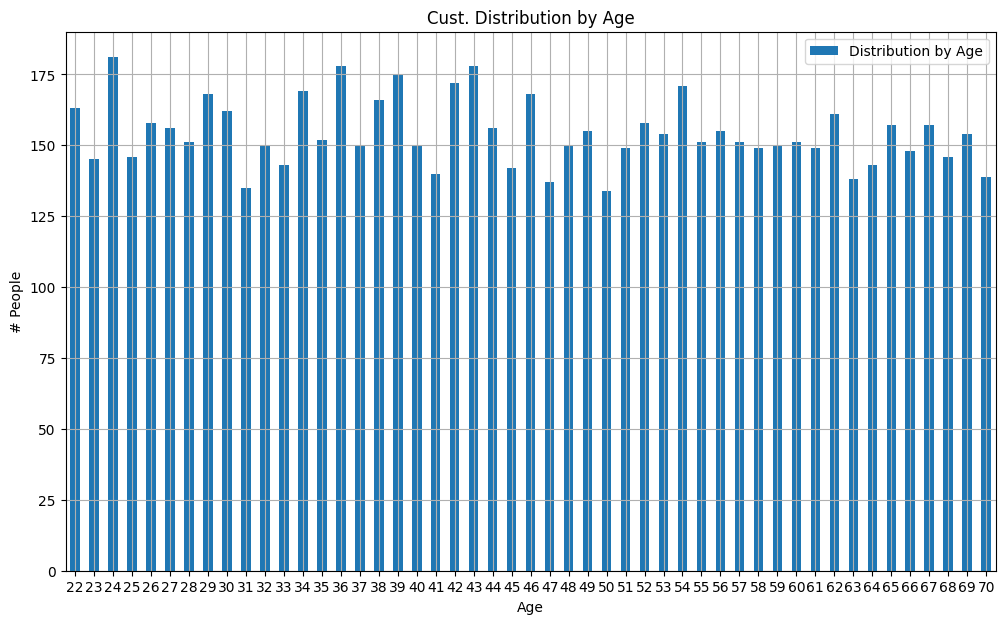

In [8]:
data3 = pd.DataFrame(\
                      #Mengelompokkan berdasarkan usia
                       df_all.groupby(by=['Age'])['Customer ID']\
                      #Diagegatkan dengan menghitung jumlahnya (count)
                       .count()\
                      #reset nama header
                       .reset_index(name='Distribution by Age'))
data3.sort_values(\
                  by=['Age'], \
                  ascending=True, \
                  inplace=True)
data3.plot(x='Age',
          y=['Distribution by Age'],
          kind='bar',
          grid=True,
          xlabel='Age',
          ylabel='# People',
          figsize=(12,7),
          rot=0,
          title='Cust. Distribution by Age',
          table=False,
          secondary_y = False)

Distrbusi bisa dikatakan rata antara rentang usia 22 sampai 70 tahun di mana tidak terlihat kecenderungan pada usia-usia tertentu

<Axes: title={'center': 'Unpaid Cust. Distribution by Age'}, xlabel='Age', ylabel='# People'>

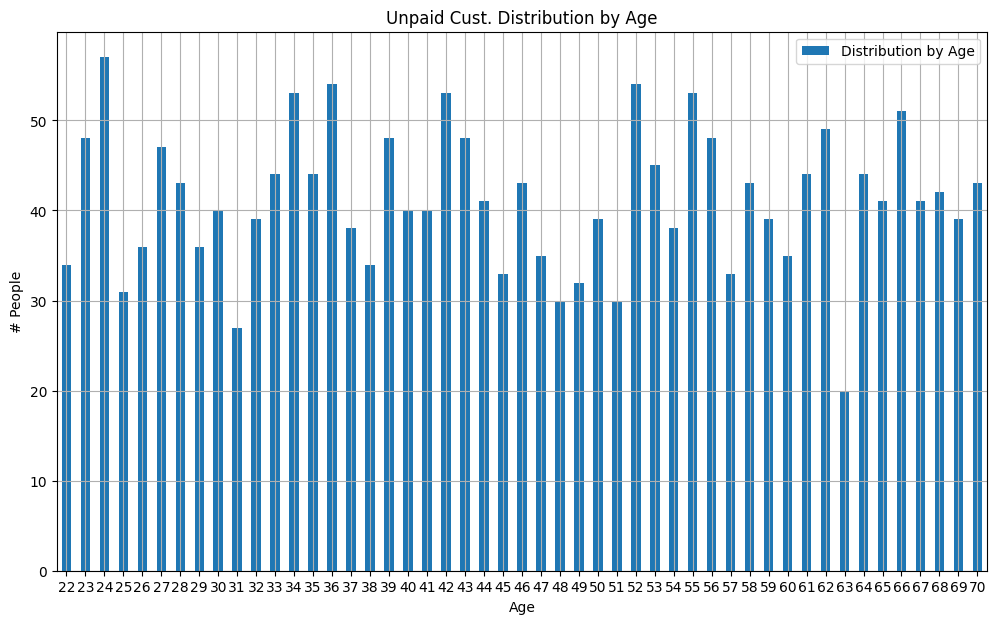

In [9]:
data4 = pd.DataFrame(\
                      #Mengelompokkan berdasarkan usia
                       df_all[df_all['Unpaid Tagging']==1].groupby(by=['Age'])['Customer ID']\
                      #Diagegatkan dengan menghitung jumlahnya (count)
                       .count()\
                      #reset nama header
                       .reset_index(name='Distribution by Age'))
data4.sort_values(\
                  by=['Age'], \
                  ascending=True, \
                  inplace=True)
data4.plot(x='Age',
          y=['Distribution by Age'],
          kind='bar',
          grid=True,
          xlabel='Age',
          ylabel='# People',
          figsize=(12,7),
          rot=0,
          title='Unpaid Cust. Distribution by Age',
          table=False,
          secondary_y = False)

Terlihat di segmen tertentu ada yang lebih rendah yang menjadi indikasi apakah usia-usia tertentu ada nilai tengah yang menonjol atau tidak.

Rata-rata saldo Nasabah

In [10]:
df_checkbalance = df_all
df_checkbalance['Total Balance'] = df_checkbalance['Balance Q1'] + df_checkbalance['Balance Q2'] + df_checkbalance['Balance Q3'] + df_checkbalance['Balance Q4']
df_checkbalance['Avg Balance'] = (df_checkbalance['Balance Q1'] + df_checkbalance['Balance Q2'] + df_checkbalance['Balance Q3'] + df_checkbalance['Balance Q4'])/4

data5 = pd.DataFrame(\
                      df_checkbalance.groupby(by=['Unpaid Tagging'])['Total Balance']\
                      .mean()\
                      .reset_index(name='Avg Annual Balance'))
data5

,Unpaid Tagging,Avg Annual Balance
0,0,1.985924e+08
1,1,2.527238e+08


Secara rata-rata orang-orang yang gagal bayar memiliki rata-rata annual balance yang lebih tinggi

In [11]:
data6 = pd.DataFrame(\
                      df_checkbalance.groupby(by=['Unpaid Tagging'])['Avg Balance']\
                      .mean()\
                      .reset_index(name='Avg Quarterly Balance'))
data6

,Unpaid Tagging,Avg Quarterly Balance
0,0,4.964809e+07
1,1,6.318095e+07


Secara rata-rata orang-orang yang gagal bayar memiliki rata-rata quarter balance yang lebih tinggi

Rata-rata kepemilikan produk

In [12]:
df_checkbalance['Avg Product'] = (df_checkbalance['NumOfProducts Q1'] +
                                   df_checkbalance['NumOfProducts Q2'] +
                                   df_checkbalance['NumOfProducts Q3'] +
                                   df_checkbalance['NumOfProducts Q4'])/4
data7 = pd.DataFrame(\
                      df_checkbalance.groupby(by=['Unpaid Tagging'])['Avg Product']\
                      .mean()\
                      .reset_index(name='Avg Product Owned'))
data7

,Unpaid Tagging,Avg Product Owned
0,0,1.667223
1,1,1.609336


Tidak ada perbedaan yang menonjol dari nasabah yang gagal bayar dan tidak untuk kepemilikan produk

In [13]:
df_all = df_all.drop(columns=['Total Balance', 'Avg Balance', 'Avg Product'])

# Data Preparation

## Pengecekan Data Duplikai dan *Missing Value*

In [14]:
df_all.duplicated().sum()

0

In [15]:
df_all.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


# Penambahan Variabel Relevan

**Rata-rata Saldo & Perubahan Saldo Selama Periode Observasi**
Melihat saldo nasabah dalam scope observasi
1. Experiment 1: Rata-rata saldo nasabah dalam 1 tahun terakhir & perubahan saldo di Q4 terhadap Q1
2. Experiment 2: Rata-rata saldo nasabah dalam 6 bulan terakhir & perubahan saldo di Q4 terhadap Q2

Experiment 1

In [16]:
df1['Mean Balance'] = (df1['Balance Q1'] + df1['Balance Q2'] + df1['Balance Q3'] + df1['Balance Q4'])/4
df1['Delta Balance'] = df1['Balance Q4'] - df1['Balance Q1']
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


Mean balance untuk mengetahui rata-rata selama satu tahun, sedangkan Delta balance untuk mengetahui apakah terjadi perubahan atau tidak dari periode terakhir dibandingkan dengan periode awal, jika semisal 0 berarti selalu konstan, jika negatif ada penurunan saldo yang nasabah endapkan, jika positif berarti balance meningkat setiap quarter.

Experiment 2

In [17]:
df2['Mean Balance']= (df2['Balance Q3'] + df2['Balance Q4'])/2
df2['Delta Balance'] = df2['Balance Q4'] - df2['Balance Q2']
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68


Mean balance untuk mengetahui rata-rata selama 6 bulan, sedangkan Delta balance untuk mengetahui apakah terjadi perubahan atau tidak dari periode terakhir dibandingkan dengan periode awal, jika semisal 0 berarti selalu konstan, jika negatif ada penurunan saldo yang nasabah endapkan, jika positif berarti balance meningkat setiap quarter.

**Status keaktifan**
Melihat periode nasabah aktif dalam scope observasi
1. Experiment 1 --> Keaktifan nasabah (dalam bulan) di 1 tahun terakhir
2. Experiment 2 --> Keaktifan nasabah (dalam bulan) di 6 bulan terakhir

Experiment 1

In [18]:
df1['Active Months'] = (df1['ActiveMember Q1'] + df1['ActiveMember Q2'] + df1['ActiveMember Q3'] + df1['ActiveMember Q4'])*3
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


Menunjukkan seberapa aktif nasabah, satu Quarter berisi 3 bulan, jadi semisal Active Months Nasabah 6 maka nasabah tersebut aktif selama 2 Quarter.

Experiment 2

In [19]:
df2['Active Months'] = (df1['ActiveMember Q3'] + df1['ActiveMember Q4'])*3
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68,6


Menunjukkan seberapa aktif nasabah dalam 2 Quarter terakhir, satu Quarter berisi 3 bulan, jadi semisal Active Months Nasabah 6 maka nasabah tersebut aktif selama 2 Quarter.

**Penambahan/Pengurangan Product Holding**
Melihat fluktuasi kepemilikan produk nasabah dalam periode observasi

Experiment 1

In [20]:
df1['Diff PH'] = df1['NumOfProducts Q4'] - df1['NumOfProducts Q1']
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


Experiment 2

In [21]:
df2['Diff PH'] = df2['NumOfProducts Q4'] - df2['NumOfProducts Q2']
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68,6,0


**Lama Kepemilikan Kartu Kredit Dalam Periode Observasi**

In [22]:
def assign_cr1(row): # Add 'row' as an argument to receive the DataFrame row
    if row['HasCrCard Q4'] == 1:  # Use the correct column name and check for different quarters
        return 12
    elif row['HasCrCard Q3'] == 1:
        return 9
    elif row['HasCrCard Q2'] == 1:
        return 6
    elif row['HasCrCard Q1'] == 1:
        return 3
    else:
        return 0  # Return 0 if no credit card in any quarter

Experiment 1

In [23]:
df1['Vintage_CR'] = df1.apply(assign_cr1, axis=1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0,12


Experiment 2

In [24]:
df2['Vintage_CR'] = df2.apply(assign_cr1, axis=1)
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1,0.00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0,675910.12,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1,0.00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0,555048.18,431190.68,6,0,12


# Penghapusan Variabel

Status Kepemilikan sudah diganti dengan lama kepemilikan kartu kredit

In [25]:
# Check if columns exist before dropping in df1
columns_to_drop = ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4']
for column in columns_to_drop:
    if column in df1.columns:
        df1 = df1.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df1. Skipping.") # Print message to show which column is not found.

# Check if columns exist before dropping in df2 (This part of your code is correct)
columns_to_drop = ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4']
for column in columns_to_drop:
    if column in df2.columns:
        df2 = df2.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df2. Skipping.") # Print message to show which column is not found.

Column 'HasCrCard Q1' not found in df2. Skipping.


Balance Per Quarter sudah digantikan dengan rata-rata saldo dalam periode observasi dan selisih saldo di awal dan akhir periode observasi.

In [26]:
# Check if columns exist before dropping in df1
columns_to_drop = ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4']
for column in columns_to_drop:
    if column in df1.columns:
        df1 = df1.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df1. Skipping.") # Print message to show which column is not found.

# Check if columns exist before dropping in df2
columns_to_drop = ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4']
for column in columns_to_drop:
    if column in df2.columns:
        df2 = df2.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df2. Skipping.") # Print message to show which column is not found.

Column 'Balance Q1' not found in df2. Skipping.


Jumlah Kepemilikan Produk sudah digantikan dengan fluktuasi kepemilikan produk pada periode observasi.

In [27]:
# Check if columns exist before dropping in df1
columns_to_drop = ['NumOfProducts Q1','NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4']
for column in columns_to_drop:
    if column in df1.columns:
        df1 = df1.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df1. Skipping.") # Print message to show which column is not found.

# Check if columns exist before dropping in df2
columns_to_drop = ['NumOfProducts Q1','NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4']
for column in columns_to_drop:
    if column in df2.columns:
        df2 = df2.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df2. Skipping.") # Print message to show which column is not found.

Column 'NumOfProducts Q1' not found in df2. Skipping.


Status Keaktifan Nasabah Per Quarter digantikan dengan Status Keaktifan dalam Bulan

In [28]:
# Check if columns exist before dropping in df1
columns_to_drop = ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4']
for column in columns_to_drop:
    if column in df1.columns:
        df1 = df1.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df1. Skipping.")

# Check if columns exist before dropping in df2
columns_to_drop = ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4']
for column in columns_to_drop:
    if column in df2.columns:
        df2 = df2.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df2. Skipping.")  # Print message to show which column is not found.

Column 'ActiveMember Q1' not found in df2. Skipping.


# Data Transformation
Pemisahan Variabel Prediktor

In [29]:
predictor1 = df1[df1.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2 = df2[df2.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [30]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1187036.18,0,296759.045,12
1,3,68,17000000,1005,Jakarta,0.00,0,0.000,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,337955.060,12
3,3,42,19000000,1008,Jakarta,0.00,0,0.000,12
4,6,43,29000000,1009,Jakarta,431190.68,0,277524.090,12


In [31]:
predictor2.head()

,Active Months,ActiveMember Q5,Age,Avg. Annual Income/Month,Balance Q5,Branch Code,City,Delta Balance,Diff PH,HasCrCard Q5,Mean Balance,NumOfProducts Q5,Vintage_CR
0,3,1,29,33000000,1305739.798,1001,Jakarta,1187036.18,0,1,593518.09,1,12
1,0,0,68,17000000,0.000,1005,Jakarta,0.00,0,1,0.00,2,12
2,3,1,25,12000000,1622184.288,1009,Jakarta,1351820.24,0,1,675910.12,2,12
3,0,0,42,19000000,0.000,1008,Jakarta,0.00,0,1,0.00,4,12
4,6,0,43,29000000,431190.680,1009,Jakarta,431190.68,0,1,555048.18,3,12


Melakukan Encoding untuk Data Category


---

Kategori variabel:

1. Branch Code
2. City

Untuk branch code perlu diubah menjadi string agar dianggap sebagai data kategori.

In [32]:
predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)

<ipython-input-32-b9748522fe9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
<ipython-input-32-b9748522fe9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)


In [33]:
predictor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [34]:
predictor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   ActiveMember Q5           7561 non-null   int64  
 2   Age                       7561 non-null   int64  
 3   Avg. Annual Income/Month  7561 non-null   int64  
 4   Balance Q5                7561 non-null   float64
 5   Branch Code               7561 non-null   object 
 6   City                      7561 non-null   object 
 7   Delta Balance             7561 non-null   float64
 8   Diff PH                   7561 non-null   int64  
 9   HasCrCard Q5              7561 non-null   int64  
 10  Mean Balance              7561 non-null   float64
 11  NumOfProducts Q5          7561 non-null   int64  
 12  Vintage_CR                7561 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 768.0+ KB


Kita ubah tipe data kategori menjadi variable indikator/dummy.

In [35]:
predictor1 = pd.get_dummies(predictor1)
predictor2 = pd.get_dummies(predictor2)

In [36]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036.18,0,296759.045,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,3,68,17000000,0.00,0,0.000,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,25,12000000,1351820.24,0,337955.060,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,3,42,19000000,0.00,0,0.000,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6,43,29000000,431190.68,0,277524.090,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [37]:
predictor2.head()

,Active Months,ActiveMember Q5,Age,Avg. Annual Income/Month,Balance Q5,Delta Balance,Diff PH,HasCrCard Q5,Mean Balance,NumOfProducts Q5,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,3,1,29,33000000,1305739.798,1187036.18,0,1,593518.09,1,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,68,17000000,0.000,0.00,0,1,0.00,2,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,1,25,12000000,1622184.288,1351820.24,0,1,675910.12,2,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,42,19000000,0.000,0.00,0,1,0.00,4,12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6,0,43,29000000,431190.680,431190.68,0,1,555048.18,3,12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [38]:
predname = predictor1.columns
predname_num = predictor1.columns[0:7] #mengambil kolom yang numerik
predname_cat = predictor1.columns[7:31] #mengambil kolom yang sifatnya kategorik

In [39]:
predname

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [40]:
predname_num

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [41]:
predname_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [42]:
X1_num = predictor1[predname_num]
X2_num = predictor2[predname_num]
X1_cat = predictor1[predname_cat]
X2_cat = predictor2[predname_cat]

Standarisasi Data Numerik

In [43]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X1_num = pd.DataFrame(pt.fit_transform(X1_num))
X1_num.head()

,0,1,2,3,4,5,6
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.0
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.0
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.0
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.0
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.0


In [44]:
X1_num.columns = predname_num
X1_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.0
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.0
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.0
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.0
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.0


In [45]:
X2_num = pd.DataFrame(pt.fit_transform(X2_num))
X2_num.head()

,0,1,2,3,4,5,6
0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.0
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.0
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.0
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.0
4,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.0


In [46]:
X2_num.columns = predname_num
X2_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.0
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.0
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.0
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.0
4,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.0


# Menggabungkan Dataset Prediktor

In [47]:
X1 = pd.concat([X1_cat, X1_num], axis = 1)
X2 = pd.concat([X2_cat, X2_num], axis = 1)

In [48]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.0
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.0
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.0
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.0
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.0


In [49]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.0
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.0
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.0
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.0
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.0


In [50]:
#variabel dependen
y1 = df1['Unpaid Tagging']
y2 = df2['Unpaid Tagging']

# Mempersiapkan Dataset untuk Validation


## Import Data

In [51]:
df1_val = pd.read_csv(path_2) #untuk eksperimen 1
df2_val = pd.read_csv(path_2) #untuk eksperimen 2

## Penambahan Variabel Relevan
Rata-rata balance dan perubahan saldo.

In [52]:
df1_val['Mean Balance'] = (df1_val['Balance Q3'] + df1_val['Balance Q2'] + df1_val['Balance Q5'] + df1_val['Balance Q4'])/4
df1_val['Delta Balance'] = df1_val['Balance Q5'] - df1_val['Balance Q2']

In [53]:
df2_val['Mean Balance']= (df2_val['Balance Q4'] + df2_val['Balance Q5'])/2
df2_val['Delta Balance'] = df2_val['Balance Q5'] - df2_val['Balance Q3']

## Status Keaktifan

In [54]:
df1_val['Active Months'] = (df1_val['Balance Q3'] + df1_val['Balance Q2'] + df1_val['Balance Q5'] + df1_val['Balance Q4'])*3
df2_val['Mean Balance']= (df2_val['Balance Q4'] + df2_val['Balance Q5'])*3

## Penambahan atau Pengurangan *Product Holding*

In [55]:
df1_val['Diff PH'] = df1_val['Balance Q5'] - df1_val['Balance Q2']
df2_val['Diff PH'] = df2_val['Balance Q5'] - df2_val['Balance Q3']

## Lama Kepemilikan Kartu Kredit

In [56]:
def assign_cr2(df):
  if df['HasCrCard Q2'] == 1:
    return 12
  elif df['HasCrCard Q3'] == 1:
    return 9
  elif df['HasCrCard Q4'] == 1:
    return 6
  else:
    return 3
  return np.nan

In [57]:
df1_val['Vintage_CR'] = df1_val.apply(assign_cr2, axis=1)
df2_val['Vintage_CR'] = df2_val.apply(assign_cr2, axis=1)

## Pengahapusan Variabel

In [58]:
# Drop columns from df1_val, only if they exist
columns_to_drop_df1 = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4',
                       'Balance Q5','Balance Q2','Balance Q3','Balance Q4',
                       'NumOfProducts Q5','NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4',
                       'ActiveMemberQ5','ActiveMemberQ2', 'ActiveMemberQ3', 'ActiveMemberQ4']

for column in columns_to_drop_df1:
    if column in df1_val.columns:
        df1_val = df1_val.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df1_val. Skipping.")

# Drop columns from df2_val, only if they exist
columns_to_drop_df2 = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4',
                       'Balance Q5','Balance Q2','Balance Q3','Balance Q4',
                       'NumOfProducts Q5','NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4',
                       'ActiveMemberQ5','ActiveMemberQ2', 'ActiveMemberQ3', 'ActiveMemberQ4']

for column in columns_to_drop_df2:
    if column in df2_val.columns:
        df2_val = df2_val.drop(columns=[column])
    else:
        print(f"Column '{column}' not found in df2_val. Skipping.")

Column 'ActiveMemberQ5' not found in df1_val. Skipping.
Column 'ActiveMemberQ2' not found in df1_val. Skipping.
Column 'ActiveMemberQ3' not found in df1_val. Skipping.
Column 'ActiveMemberQ4' not found in df1_val. Skipping.
Column 'ActiveMemberQ5' not found in df2_val. Skipping.
Column 'ActiveMemberQ2' not found in df2_val. Skipping.
Column 'ActiveMemberQ3' not found in df2_val. Skipping.
Column 'ActiveMemberQ4' not found in df2_val. Skipping.


## Pemilihan Variabel Prediktor

In [59]:
predictor1_val = df1_val[df1_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2_val = df2_val[df2_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]

predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)

predictor1_val = pd.get_dummies(predictor1_val)
predictor2_val = pd.get_dummies(predictor2_val)

<ipython-input-59-5603a55ecf71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
<ipython-input-59-5603a55ecf71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)


In [60]:
# Get the common numerical and categorical columns between predictor1 and predictor1_val
predname_num_val = list(set(predname_num) & set(predictor1_val.columns))
predname_cat_val = list(set(predname_cat) & set(predictor1_val.columns))

# Now use these common columns for selection
X1_num_val = predictor1_val[predname_num_val]
X1_cat_val = predictor1_val[predname_cat_val]

# Similarly for predictor2_val
predname_num_val2 = list(set(predname_num) & set(predictor2_val.columns))
predname_cat_val2 = list(set(predname_cat) & set(predictor2_val.columns))

X2_num_val = predictor2_val[predname_num_val2]
X2_cat_val = predictor2_val[predname_cat_val2]

In [61]:
X1_num_val = pd.DataFrame(pt.fit_transform(X1_num_val))
X2_num_val = pd.DataFrame(pt.fit_transform(X2_num_val))

X1_val = pd.concat([X1_cat, X1_num], axis=1)
X2_val = pd.concat([X2_cat, X2_num], axis=1)

In [62]:
#variabel dependen
y1_val = df1_val['Unpaid Tagging']
y2_val = df2_val['Unpaid Tagging']

## Pengecekan Korelasi

Variabel yang berkorelasi lebih dari 0.7 akan didrop

In [63]:
corrtest1 = X1.corr().abs()
corrtest2 = X2.corr().abs()

In [64]:
#Membuang nilai redundan pada matriks
upper1 = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper2 = corrtest2.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))

#Mencari nilai yang berkorelasi di atas 0.7
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

#menghapus kolom yang korelasinya >0.7
X1 = X1.drop(to_drop1, axis=1) # Changed t_drop1 to to_drop1
X2 = X2.drop(to_drop2, axis=1)
X1_val = X1_val.drop(to_drop1, axis=1)
X2_val = X2_val.drop(to_drop2, axis=1)

In [65]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.0
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.0
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.0
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.0
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.0


In [66]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.0
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.0
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.0
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.0
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.0


Tidak ada kolom yang ter drop, artinya tidak ada yang berkorelasi lebih dari 0.7

## *Splitting Train & Test Data*

In [67]:
y1.value_counts()
y2.value_counts()

,count
Unpaid Tagging,
0,4852
1,2709


In [68]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=30)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=30)

# Modeling

Pembangunan model akan menggunakan 3 algoritma:

1. Logistic Regression
2. Gradient Boosting
3. Random Forest

## Logistic Regression

Melakukan Definisi Hyperparameter

In [69]:
penalty = ['l2']  # Change '12' to a valid penalty value like 'l2'
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter = [14000]
param_distribution = dict(penalty=penalty, tol=tol, fit_intercept=fit_intercept,
                           intercept_scaling=intercept_scaling, class_weight=class_weight,
                            solver=solver, max_iter = max_iter)

Melakukan pencarian hyperparameter terbaik

In [70]:
from sklearn.model_selection import GridSearchCV

Experiment 1

In [71]:
import time
#cross validation
logreg = LogisticRegression()
grid = GridSearchCV(estimator=logreg, param_grid=param_distribution,
        scoring = 'recall', cv=5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X1_train, y1_train)
#Summarize results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s') # Changed start.time to start_time

Best: 0.525143 using {'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Execution time: 81.55277276039124 s


Experiment 2

In [72]:
import time
#cross validation
logreg = LogisticRegression()
grid = GridSearchCV(estimator=logreg, param_grid=param_distribution,
        scoring = 'recall', cv=5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X2_train, y2_train)
#Summarize results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
print('Execution time: ' + str((time.time() - start_time)) + ' s') # Changed start.time to start_time

Best: 0.449921 using {'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 0.75, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
Execution time: 67.55991983413696 s


## Gradient Boosting

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [74]:
bparameter = {'max_depth':[5,10,15], 'gamma':[0.0, 0.1, 0.2, 0.3],
                'n_estimators':[25,50,75,100], 'learning_rate':[0.05, 0.1, 0.2, 0.3],
                'scale_pos_weight':[1,3]}
score = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score),
         'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

Beberapa istilah dalam menentukan gbparameter:

* Gamma: nilai minimal loss reduction yang dibutuhkan pada saat pemecahan cabang. Semakin besar nilai gamma yang dipilih, model yang dibangun akan lebih konservatif dan kemungkinan *underfitting*.
* Learning_rate: tingkat penyesuaian bobot fitur. Dalam pembangunan model, setiap iterasi menghasilkan bobot untuk fitur-fitur yang dimiliki. Learning rate berguna untuk membantu menyusutkan nilai bobot tersebut agar model yang dibangun tidak mengalami *overfitting*.
* Scale_pos_weight: pengaturan bbobot antara kelas positif (*churn*) dan negatif (*not churn*) . Hyperparameter ini berguna ketika dataset yang digunakan tidak *balance*. Nilai yang biasa digunakan adalah jumlah dari *majority class* dibagi dengan *minority class*.

Experiment 1

In [80]:
GB_Grid1 = GridSearchCV(XGBClassifier(), bparameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [76]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [78]:
start_time = time.time()
GB_result = GB_Grid1.fit(X1_train, y1_train)
#Summarize result
print('Best: %f using %s' % (GB_result.best_score_, GB_result.best_params_))
print('Execution time: ' + str((time.time() + start_time)) + 's')

Best: 0.697852 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 3478565635.4412165s


Experiment 2

In [82]:
GB_Grid2 = GridSearchCV(XGBClassifier(), bparameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [83]:
start_time = time.time()
GB2_result = GB_Grid2.fit(X2_train, y2_train)
#Summarize result
print('Best: %f using %s' % (GB2_result.best_score_, GB_result.best_params_))
print('Execution time: ' + str((time.time() + start_time)) + 's')

Best: 0.988397 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 3478566487.3563523s


## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
parameter = {'max_depth': [5,10,15,20], 'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [25,50,75,100,125], 'min_samples_split': [2,3,5,7]}
score = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score),
          'recall':make_scorer(recall_score), 'f1': make_scorer(f1_score)}

Beberapa istilah dalam menentukan parameter dalam algoritma Random Forest:

1. Max_depth: jumlah maksimal pemecahan cabang atau level dalam satu pohon. Semakin besar nilai max_depth yang ditetapkan, model akan semakin presisi dalam menggolongkan data ke suatu kelas. Akan tetapi, semakin besar nilai max_depth juga akan membuat model overfitting.
2. Max_features: jumlah maksimal fitur yang dipertimbangkan ketika melakukan pemecahan cabang (splitting node). Sama halnya dengan max_depth, semakin banyak jumlah fitur yang dipertimbangkan dalam pemecahan cabang, akan semakin detail hasil yang didapatkan tetapi juga akan membuat model overfitting terhadap data training-nya.
3. N_estimator: jumlah pohon yang akan dibangun. Semakin banyak pohon, tingkat akurasi yang didapatkan menjadi lebih baik mengingat Random Forest menggunakan konsep mahority vote dalam melakukan klasifikasi. Akan tetapi, semakin banyakk pohon yang dibangung, waktu komputasi yang dibutuhkan juga akan semakin tinggi.
4. Min_sample_split: jumlah sampel data minimal pada sebuah internal node. Nilai yang besar dapat membuat model yang dibangun lebih konservatif. Akan tetapi, jika terlalu besar dapat menyebabkan model yang dibangun underfitting.

Experiment 1

In [86]:
RF_Grid = GridSearchCV(RandomForestClassifier(), parameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [87]:
start_time = time.time()
RF_result = RF_Grid.fit(X1_train, y1_train)
#Summarize result
print('Best: %f using %s' % (RF_result.best_score_, GB_result.best_params_))
print('Execution time: ' + str((time.time() + start_time)) + 's')

Best: 0.093424 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 3478567350.6497135s


Experiment 2

In [88]:
RF_Grid2 = GridSearchCV(RandomForestClassifier(), parameter, cv=5, refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [89]:
start_time = time.time()
RF_result2 = RF_Grid2.fit(X2_train, y2_train)
#Summarize result
print('Best: %f using %s' % (RF_result2.best_score_, RF_result2.best_params_))
print('Execution time: ' + str((time.time() + start_time)) + 's')

Best: 0.172464 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 3478568228.5088034s


# Evaluation
## Logistic Regression

Experiment 1

In [90]:
y1_pred = grid.predict(X1_test)

In [92]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y1_test, y1_pred))
print('Recall:', metrics.recall_score(y1_test, y1_pred))
metrics.completeness_score

Accuracy: 0.5495813133539004
Recall: 0.5297029702970297


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

Akurasi model cukup bagus namun secara recall sangat rendah yang menandakan banyak orang-orang yang secara aktual gagal bayar namun tidak terprediksi

In [94]:
y1_pred_val = grid.predict(X1_val)
print('Accuracy:', metrics.accuracy_score(y1_val, y1_pred_val))
print('Recall:', metrics.recall_score(y1_val, y1_pred_val))
metrics.completeness_score

Accuracy: 0.5363047215976723
Recall: 0.47840531561461797


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

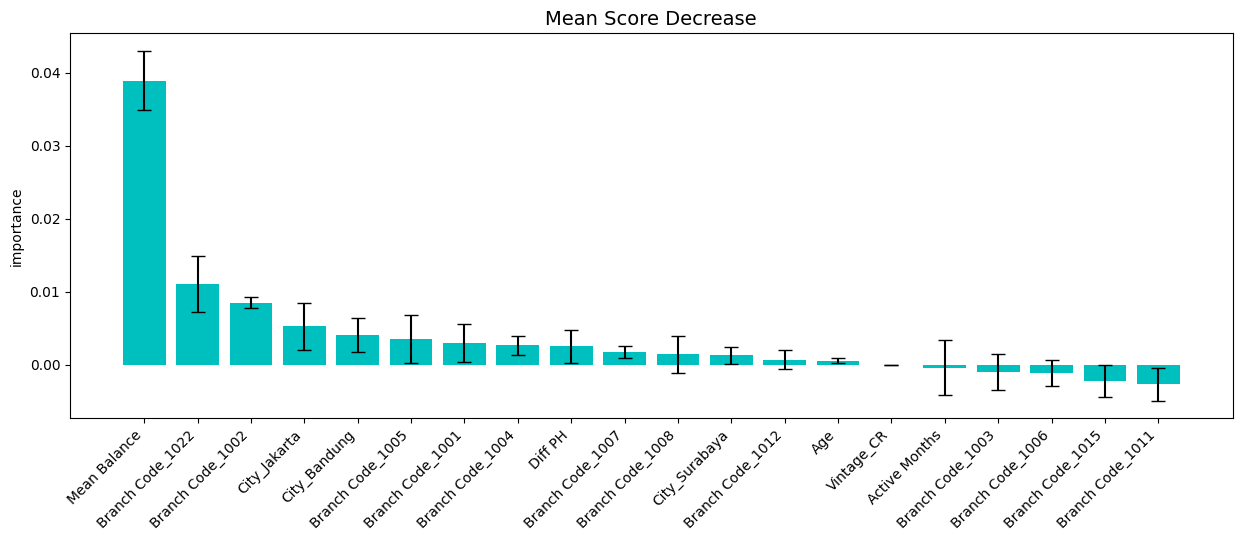

In [95]:
from jcopml.feature_importance import mean_score_decrease
df_imp1 = mean_score_decrease(X1_train, y1_train, grid, plot=True, topk=20)

Dari model variabel yang dianggap penting dalam prediksi yaitu mean Balance

Experiment 2

In [96]:
y2_pred = grid.predict(X2_test)

In [97]:
print('Accuracy:', metrics.accuracy_score(y2_test, y2_pred))
print('Recall:', metrics.recall_score(y2_test, y2_pred))
metrics.completeness_score

Accuracy: 0.5337152930806522
Recall: 0.4735547355473555


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [98]:
y2_pred_val = grid.predict(X2_val)
print('Accuracy:', metrics.accuracy_score(y2_val, y2_pred_val))
print('Recall:', metrics.recall_score(y2_val, y2_pred_val))
metrics.completeness_score

Accuracy: 0.5363047215976723
Recall: 0.48025101513473606


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

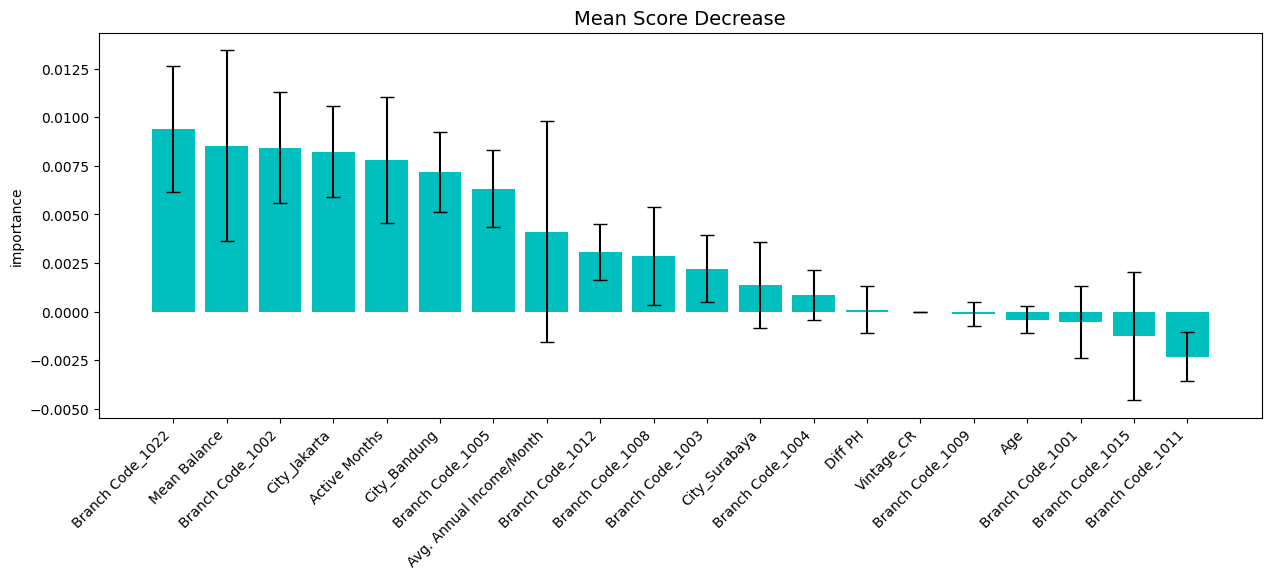

In [99]:
df_imp2 = mean_score_decrease(X2_train, y2_train, grid, plot=True, topk=20)

##Gradient Boosting

Experiment 1

In [101]:
GB_Grid1.fit(X1_train, y1_train)  # Fit the model
y11_pred = GB_Grid1.predict(X1_test)  # Now you can make predictions

In [102]:
print('Accuracy:', metrics.accuracy_score(y1_test, y11_pred))
print('Recall:', metrics.recall_score(y1_test, y11_pred))
metrics.completeness_score

Accuracy: 0.5081533715293081
Recall: 0.7211221122112211


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [103]:
y11_pred_val = GB_Grid1.predict(X1_val)

In [104]:
print('Accuracy:', metrics.accuracy_score(y1_val, y11_pred_val))
print('Recall:', metrics.recall_score(y1_val, y11_pred_val))
metrics.completeness_score

Accuracy: 0.49305647401137415
Recall: 0.6537467700258398


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

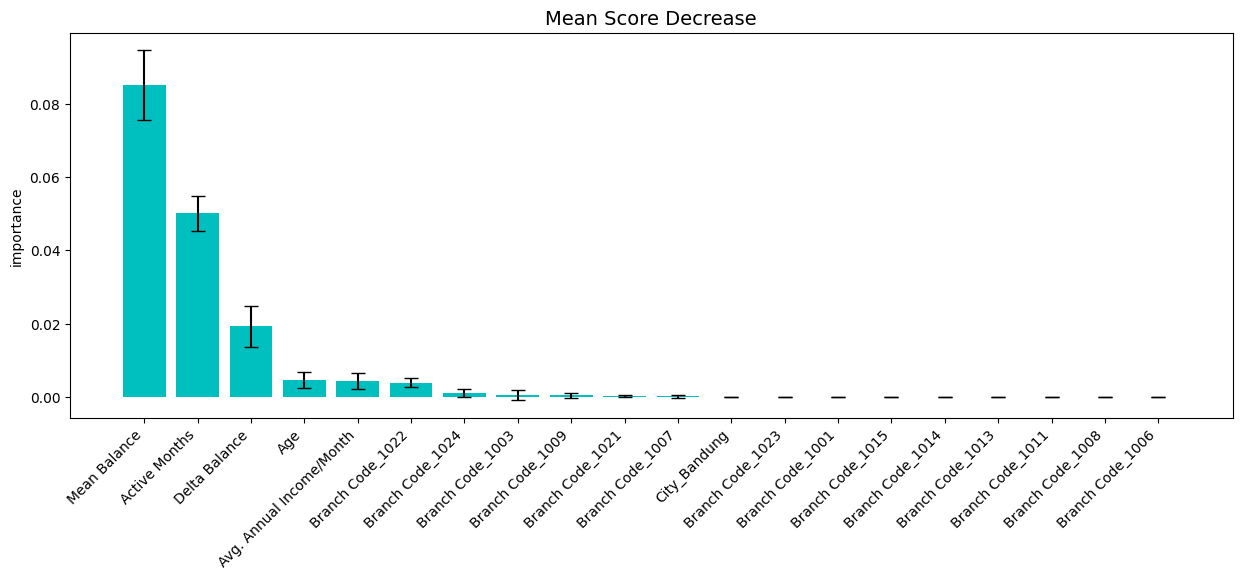

In [105]:
df_imp3 = mean_score_decrease(X2_train, y2_train, GB_Grid1, plot=True, topk=20)

Experiment 2

In [106]:
y22_pred = GB_Grid2.predict(X2_test)

In [107]:
print('Accuracy:', metrics.accuracy_score(y2_test, y22_pred))
print('Recall:', metrics.recall_score(y2_test, y22_pred))
metrics.completeness_score

Accuracy: 0.3596297928602909
Recall: 0.97539975399754


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [108]:
y22_pred_val = GB_Grid2.predict(X2_val)

In [109]:
print('Accuracy:', metrics.accuracy_score(y2_val, y22_pred_val))
print('Recall:', metrics.recall_score(y2_val, y22_pred_val))
metrics.completeness_score

Accuracy: 0.36846977912974477
Recall: 0.9926172019195275


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

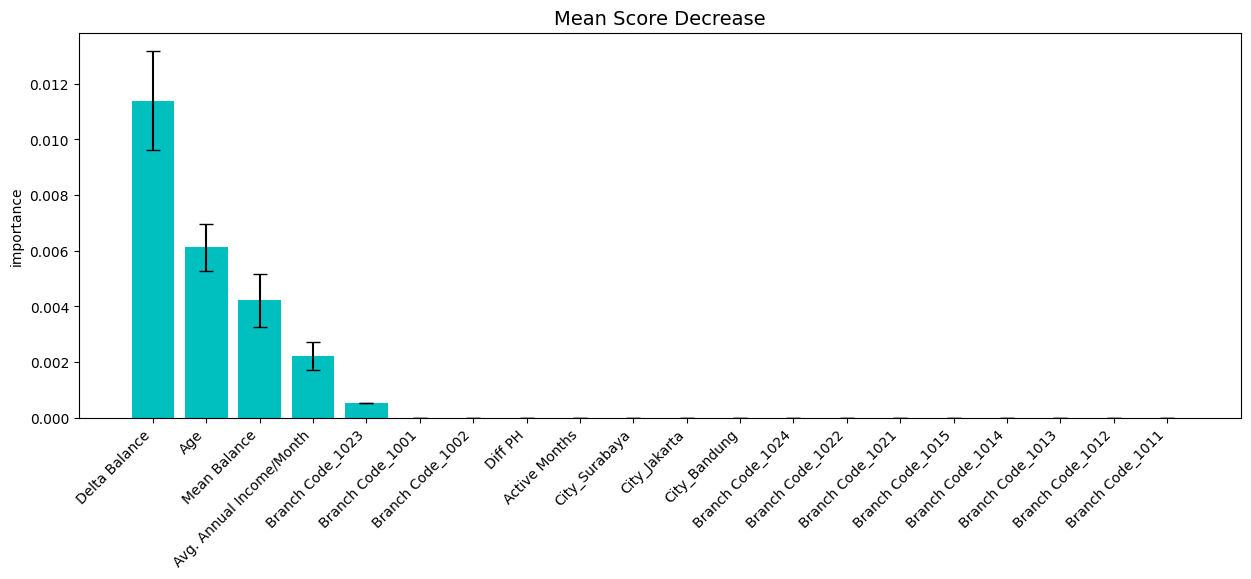

In [110]:
df_imp4 = mean_score_decrease(X2_train, y2_train, GB_Grid2, plot=True, topk=20)

## Random Forest
Experiment 1

In [111]:
y12_pred =RF_Grid.predict(X1_test)

In [112]:
print('Accuracy:', metrics.accuracy_score(y1_test, y12_pred))
print('Recall:', metrics.recall_score(y1_test, y12_pred))
metrics.completeness_score

Accuracy: 0.7104451300132217
Recall: 0.09075907590759076


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [113]:
y12_pred_val =RF_Grid.predict(X1_val)

In [114]:
print('Accuracy:', metrics.accuracy_score(y1_val, y12_pred_val))
print('Recall:', metrics.recall_score(y1_val, y12_pred_val))
metrics.completeness_score

Accuracy: 0.6956751752413702
Recall: 0.3359173126614987


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

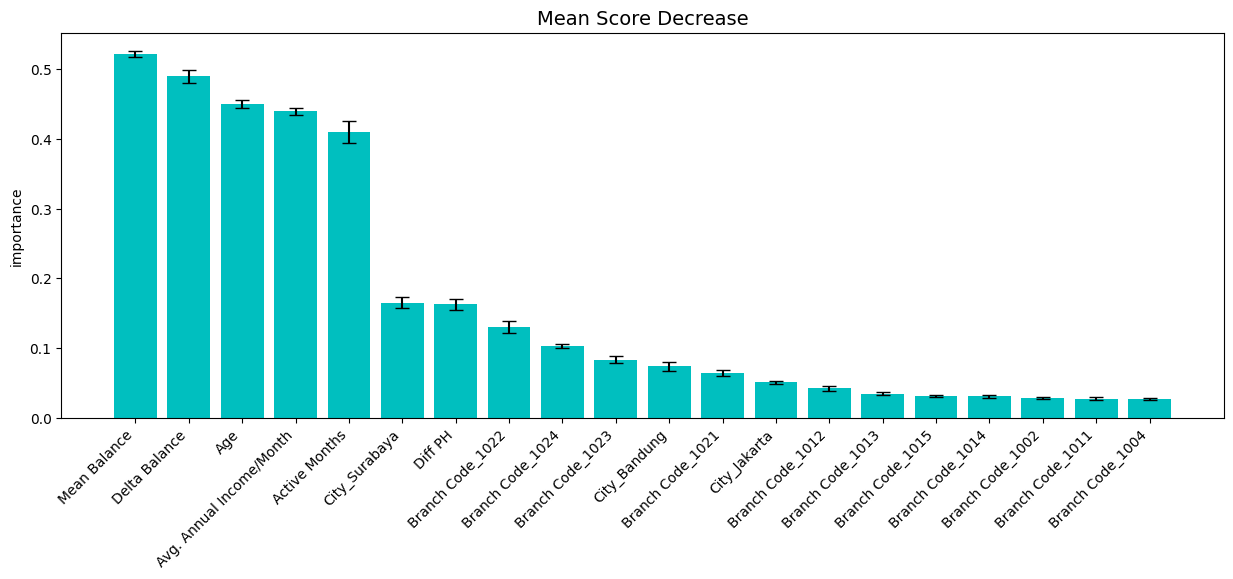

In [115]:
df_imp5 = mean_score_decrease(X1_train, y1_train, RF_Grid, plot=True, topk=20)

Experiment 2

In [116]:
y21_pred =RF_Grid2.predict(X2_test)

In [117]:
print('Accuracy:', metrics.accuracy_score(y2_test, y21_pred))
print('Recall:', metrics.recall_score(y2_test, y21_pred))
metrics.completeness_score

Accuracy: 0.6037902159541648
Recall: 0.15129151291512916


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [118]:
y21_pred_val =RF_Grid2.predict(X2_val)

In [119]:
print('Accuracy:', metrics.accuracy_score(y2_val, y21_pred_val))
print('Recall:', metrics.recall_score(y2_val, y21_pred_val))
metrics.completeness_score

Accuracy: 0.8604681920380902
Recall: 0.6888150609080842


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

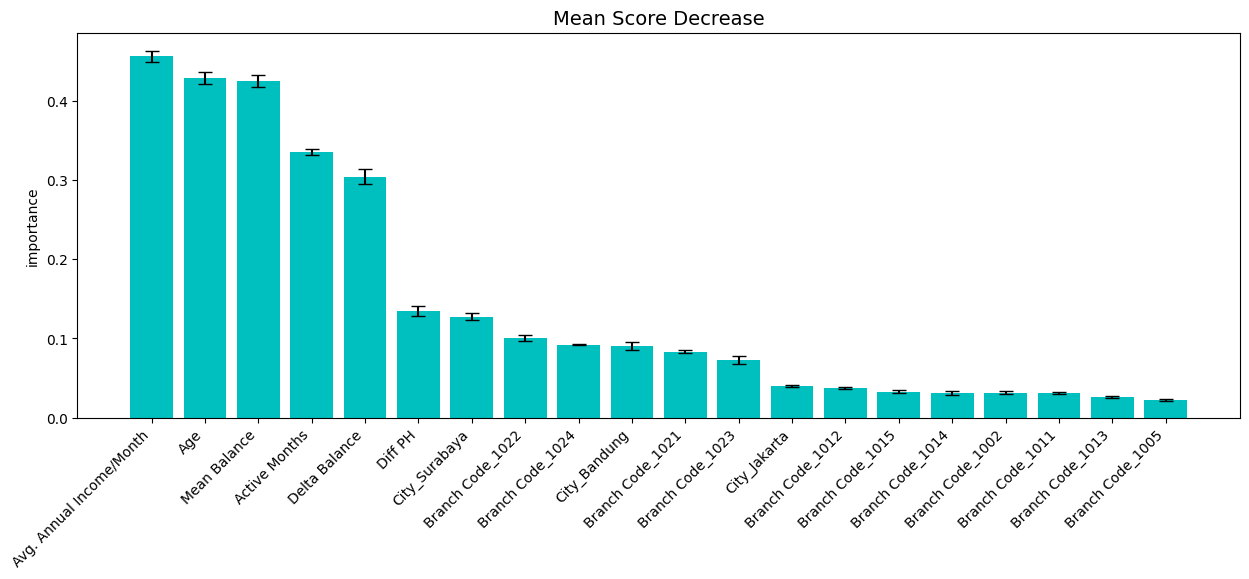

In [120]:
df_imp6 = mean_score_decrease(X2_train, y2_train, RF_Grid2, plot=True, topk=20)

# Kesimpulan

Berdasarkan hasil eksperimen, performa model berbeda-beda tergantung pada algoritma yang digunakan:

1. Logistic Regression menunjukkan akurasi sekitar 53-55%, tetapi recall hanya sekitar 47-53%. Hal ini mengindikasikan bahwa model cukup seimbang dalam memprediksi secara keseluruhan, tetapi masih cukup banyak sampel yang tidak terdeteksi dengan baik.

2. Gradient Boosting memiliki akurasi yang cenderung lebih rendah (36-50%), tetapi recall sangat tinggi (72-99%). Model ini lebih baik dalam menangkap sampel positif (misalnya, kasus gagal bayar dalam konteks tertentu), tetapi akurasinya turun drastis, menunjukkan banyak false positive.

3. Random Forest memiliki akurasi yang lebih tinggi dibanding model lainnya, terutama pada eksperimen kedua (hingga 86%). Namun, recall masih cukup rendah di beberapa skenario (9-68%), menunjukkan bahwa model ini lebih fokus pada prediksi yang lebih pasti, tetapi mengorbankan sensitivitas terhadap kelas positif.

**Dari hasil ini, disimpulkan bahwa masih ada trade-off antara akurasi dan recall, di mana beberapa model lebih baik dalam menangkap kasus tertentu tetapi dengan konsekuensi tingkat kesalahan prediksi yang tinggi. Dengan demikian, objektif model yang diharapkan masih belum sepenuhnya tercapai.**


Solusi Pengembangan ke Depannya:
* Menyeimbangkan data dengan teknik seperti oversampling pada kelas minor atau undersampling pada kelas mayor agar model tidak bias.
* Menambah atau mengurangi fitur berdasarkan analisis feature importance untuk meningkatkan prediksi.
* Mengeksplorasi hyperparameter tuning lebih lanjut untuk meningkatkan keseimbangan antara akurasi dan recall.
* Menguji algoritma lain, seperti XGBoost atau Neural Networks, untuk melihat apakah ada model yang lebih baik menangkap pola dalam data.
* Menambah jumlah sampel untuk meningkatkan generalisasi model terhadap populasi yang lebih luas.
